# MEK4420 - Obligatorisk oppgave1
#### Ana Costa Conrado

Click on a cell and click "SHIFT + ENTER" to execute it


In [8]:
#Loading python packages:
import sympy
import numpy
import matplotlib.pyplot
%matplotlib inline
import math
from __future__ import division

Function defined to integrate with Gaussian quadrature (2 points).
N is the number of points at the circumference.
nn is the normal



In [9]:
def func(xp, yp, xm, ym, barx, bary, nn, N):
     
    ds = numpy.sqrt((xp - xm)**2 + (yp-ym)**2)
    hh = numpy.zeros(N)
    dtheta = numpy.zeros((N,N))   
    for i in range(N):
        helpv = 0
 
        for j in range(N):
             
            if j-i == 0:
                dtheta[i][j] = - math.pi
            else:
                a1 = xm[j] - barx[i]
                a2 = ym[j] - bary[i]
                b1 = xp[j] - barx[i]
                b2 = yp[j] - bary[i]
                
                cosan = (a1*b1+a2*b2)/numpy.sqrt((a1**2+a2**2)*(b1**2+b2**2))
                if cosan > 1:
                    cosan = 1
                if cosan < -1:
                    cosan = -1      
                
                arg = numpy.arccos(cosan)    
                dtheta[i][j] = -arg     
            
            x1g = 0.5*(xp[j]-xm[j])/math.sqrt(3)+barx[j]
            y1g = 0.5*(yp[j]-ym[j])/math.sqrt(3)+bary[j]
            x2g = -0.5*(xp[j]-xm[j])/math.sqrt(3)+barx[j]
            y2g = -0.5*(yp[j]-ym[j])/math.sqrt(3)+bary[j]
        
                     
            hh0 = numpy.log((x1g-barx[i])**2+(y1g-bary[i])**2)
            
            hh0 += numpy.log((x2g-barx[i])**2+(y2g-bary[i])**2)
           
            hh0 *= 0.5
            
            helpv += hh0*nn[j]*ds[j]/2.
 
        hh[i] = helpv
  
    pdcr = numpy.linalg.lstsq(dtheta, hh.conj().transpose())
    
    da = sum(pdcr[0].conj().transpose() * nn * ds)  
    return pdcr, da

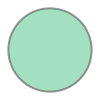

In [3]:
R0 = 1
sympy.geometry.ellipse.Ellipse(center=sympy.geometry.Point(0,0), hradius=R0, vradius=R0, eccentricity=None)

/home/anacos/anaconda3/envs/workshop/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


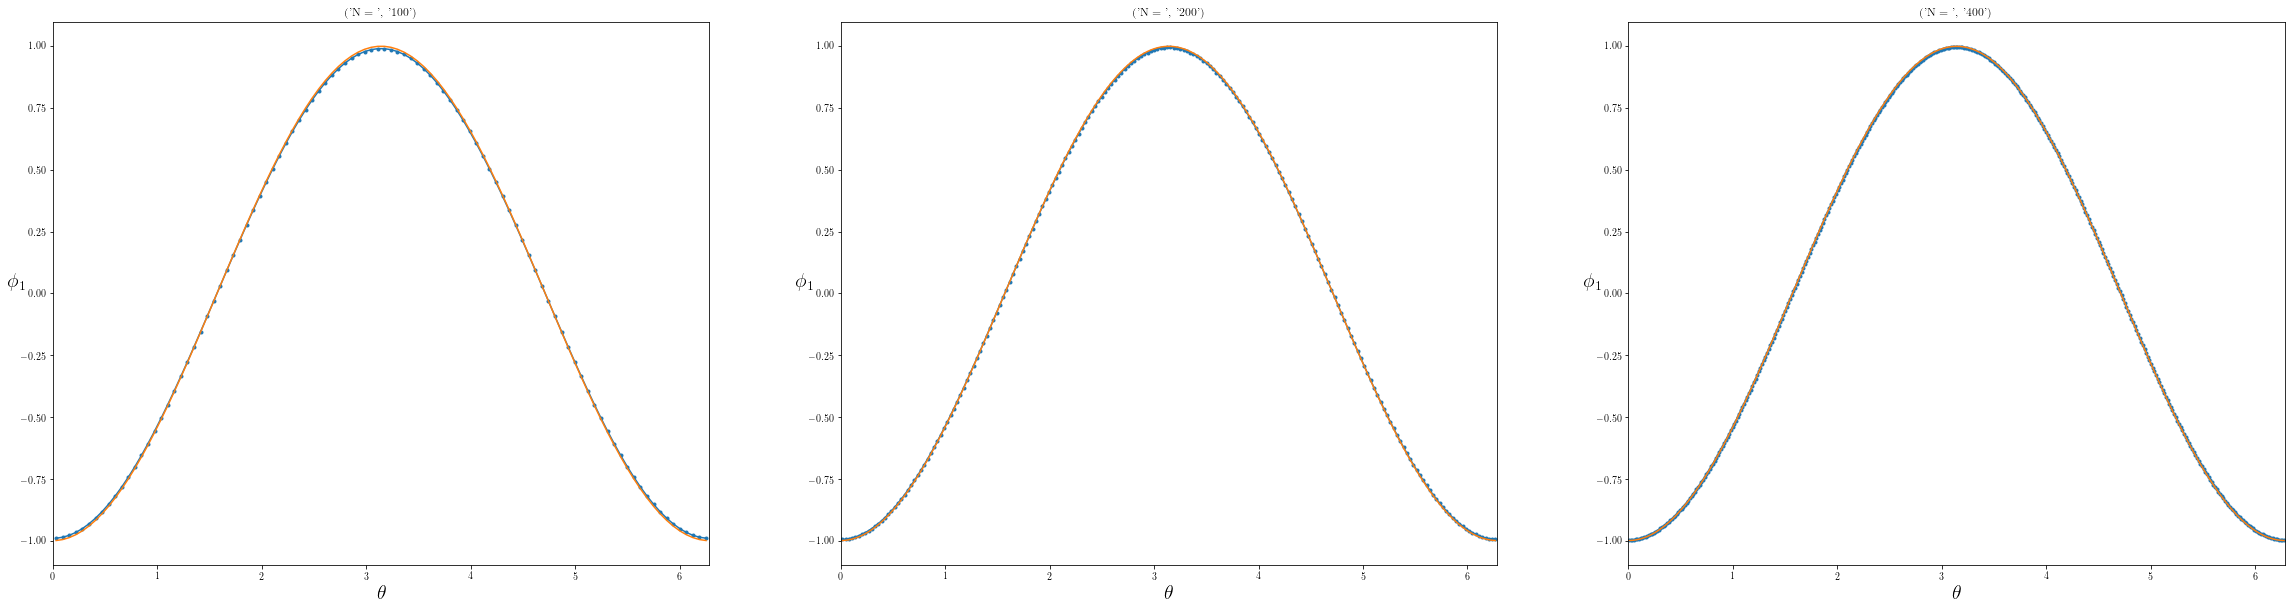

In [18]:
matplotlib.pyplot.rc('text', usetex=True)
matplotlib.pyplot.rc('font', family='serif')
fig = matplotlib.pyplot.figure(figsize=[40,10])
R0 = 1
a11 = []
rho = 1
m_ana11 = math.pi*rho*R0**2
vector=[ 100, 200, 400]
for l, N in enumerate(vector):
    thetap = numpy.linspace(2*math.pi/N, 2*math.pi, N)
    thetam = numpy.linspace(0, 2*math.pi*(N-1)/N, N)
    xp = R0*numpy.cos(thetap)
    yp = R0*numpy.sin(thetap)
    xm = R0*numpy.cos(thetam)
    ym = R0*numpy.sin(thetam)
    barx = 0.5*(xp + xm)
    bary = 0.5*(yp + ym)
    ds = numpy.sqrt((xp - xm)**2 + (yp-ym)**2)

    nn1 = -barx/numpy.sqrt(barx**2 + bary**2)
    
    pdcr1, a11j = func(xp, yp, xm, ym, barx, bary, nn1, N)

    a11.append(a11j/m_ana11)
        
    pan = - barx/(barx**2 + bary**2)
    ax= matplotlib.pyplot.subplot(1,len(vector),l+1)
    ax.axis([0, 2*numpy.pi, -1.1, 1.1])
    ax.plot(0.5*(thetap + thetam), pdcr1[0], '.', 0.5*(thetap + thetam), pan, linestyle='solid')#
    matplotlib.pyplot.ylabel(r'$\phi_1$', fontsize= 20, rotation='horizontal')
    matplotlib.pyplot.xlabel(r' $\theta  $ ', fontsize= 20)
    
    xlabel = 'N = ', str(N)
    ax.set_title(xlabel)
fig.savefig('Circle_potential.pdf')
matplotlib.pyplot.show()

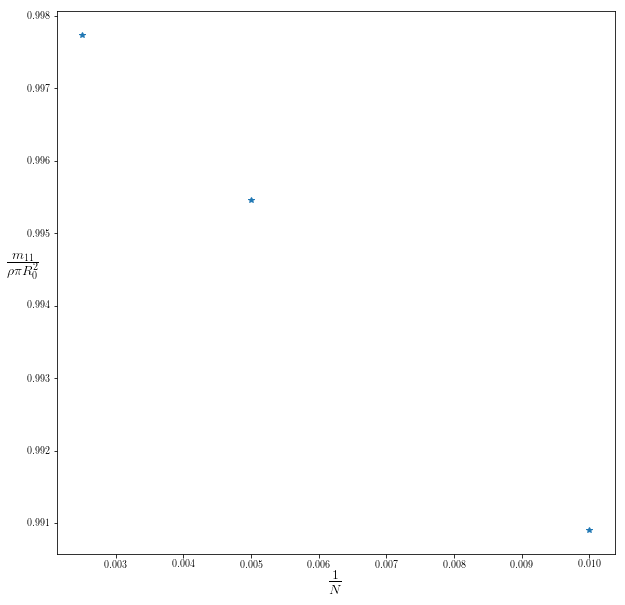

In [19]:
fig2 = matplotlib.pyplot.figure(figsize=[10,10])
matplotlib.pyplot.plot(1/numpy.array(vector), a11, '*')
matplotlib.pyplot.ylabel(r'$\frac{m_{11}}{\rho \pi R_0^2}$', fontsize= 20, rotation='horizontal')
matplotlib.pyplot.xlabel(r' $\frac{1}{N}  $ ', fontsize= 20)

fig2.savefig('Circle.pdf')

matplotlib.pyplot.show()

In [20]:
print('a11 : ', a11)

a11 :  [0.99091058490373, 0.9954559810564692, 0.99772807765119]


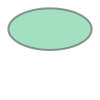

In [6]:
a0= 2
b0= 1
sympy.geometry.ellipse.Ellipse(center=sympy.geometry.Point(0,0), hradius=a0, vradius=b0, eccentricity=None)

/home/anacos/anaconda3/envs/workshop/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


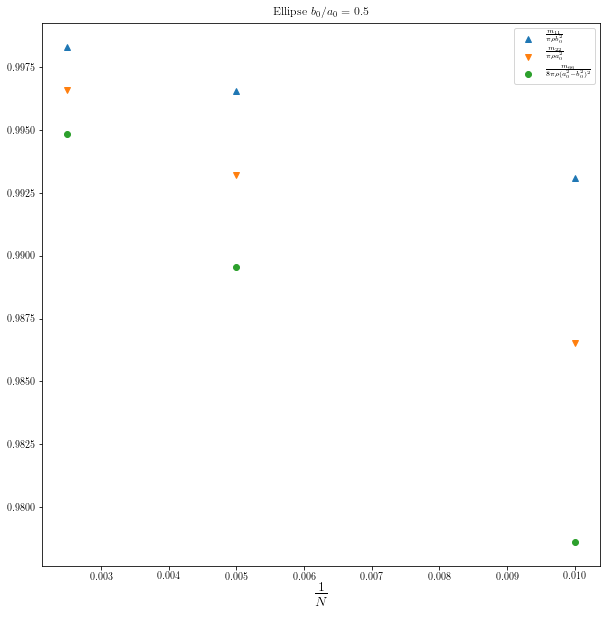

In [14]:
#ellipse of major half axis a0 and minor half axis b0

a0 = 2
b0 = 1
rho = 1
m_ana11 = math.pi*rho*b0**2
m_ana22 = math.pi*rho*a0**2
m_ana66 = (1./8)*1*math.pi*(a0**2-b0**2)**2
    
matplotlib.pyplot.rc('text', usetex=True)
matplotlib.pyplot.rc('font', family='serif')

fig = matplotlib.pyplot.figure(figsize=[10,10])

a11 = []
a22 = []
a66 = []
vector=[100, 200, 400]
for l, N in enumerate(vector):
        
    thetap = numpy.linspace(2*math.pi/N, 2*math.pi, N)
    thetam = numpy.linspace(0, 2*math.pi*(N-1)/N, N)

    xp = a0*numpy.cos(thetap)
    yp = b0*numpy.sin(thetap)
    xm = a0*numpy.cos(thetam)
    ym = b0*numpy.sin(thetam)
    barx = 0.5*(xp + xm)
    bary = 0.5*(yp + ym)
    ds = numpy.sqrt((xp - xm)**2 + (yp-ym)**2)
  
    nn1 = -(barx)/numpy.sqrt(barx**2 + bary**2*a0**4/b0**4)
    
    nn2 = -(bary)/numpy.sqrt(bary**2 + barx**2*b0**4/a0**4)
    
    nn6 = barx*nn2 - bary*nn1

    pdcr1, a11j = func(xp, yp, xm, ym, barx, bary, nn1, N)

    pdcr2, a22j = func(xp, yp, xm, ym, barx, bary, nn2, N)
    pdcr6, a66j = func(xp, yp, xm, ym, barx, bary, nn6, N)
    
    a11.append(a11j/m_ana11)
    a22.append(a22j/m_ana22)
    a66.append(a66j/m_ana66)
       
matplotlib.pyplot.plot(1/numpy.array(vector),a11,'^',1/numpy.array(vector), a22,'v',1/numpy.array(vector),a66,'o')
matplotlib.pyplot.xlabel(r' $\frac{1}{N}  $ ', fontsize= 20)
matplotlib.pyplot.legend([r'$\frac{m_{11}}{\pi \rho b_0^2}$',r"$\frac{m_{22}}{\pi\rho a_0^2}$",
                          r"$\frac{m_{66}}{8\pi\rho(a_0^2-b_0^2)^2}$"])
matplotlib.pyplot.title('Ellipse $b_{0}/a_{0}$ = 0.5')

fig.savefig('Ellipse1.pdf')
matplotlib.pyplot.show()

In [15]:
print('a11 : ', a11, 'a22 :', a22, 'a66 :', a66)

a11 :  [0.9931043676683802, 0.9965718814567534, 0.998290974861119] a22 : [0.9865223453770564, 0.9932240682780765, 0.9966022674807866] a66 : [0.9786321564960416, 0.9895431240318305, 0.9948295117927394]


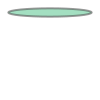

In [9]:
a0= 10
b0= 1
sympy.geometry.ellipse.Ellipse(center=sympy.geometry.Point(0,0), hradius=a0, vradius=b0, eccentricity=None)

/home/anacos/anaconda3/envs/workshop/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


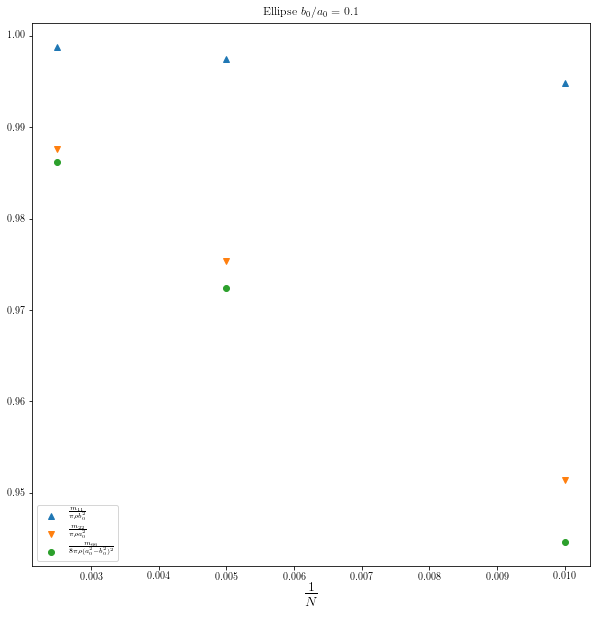

In [16]:
#ellipse of major half axis a0 and minor half axis b0

a0 = 10
b0 = 1
rho = 1
m_ana11 = math.pi*rho*b0**2
m_ana22 = math.pi*rho*a0**2        
m_ana66 = (1./8)*1*math.pi*(a0**2-b0**2)**2
    
matplotlib.pyplot.rc('text', usetex=True)
matplotlib.pyplot.rc('font', family='serif')

fig = matplotlib.pyplot.figure(figsize=[10,10])

a11 = []
a22 = []
a66 = []
vector=[100, 200, 400]
for l, N in enumerate(vector):
        
    thetap = numpy.linspace(2*math.pi/N, 2*math.pi, N)
    thetam = numpy.linspace(0, 2*math.pi*(N-1)/N, N)

    xp = a0*numpy.cos(thetap)
    yp = b0*numpy.sin(thetap)
    xm = a0*numpy.cos(thetam)
    ym = b0*numpy.sin(thetam)
    barx = 0.5*(xp + xm)
    bary = 0.5*(yp + ym)
    ds = numpy.sqrt((xp - xm)**2 + (yp-ym)**2)
    #print(ds)
    nn1 = -(barx)/numpy.sqrt(barx**2 + bary**2*a0**4/b0**4)
    
    nn2 = -(bary)/numpy.sqrt(bary**2 + barx**2*b0**4/a0**4)
    
    nn6 = barx*nn2 - bary*nn1
   
    pdcr1, a11j = func(xp, yp, xm, ym, barx, bary, nn1, N)

    pdcr2, a22j = func(xp, yp, xm, ym, barx, bary, nn2, N)
    pdcr6, a66j = func(xp, yp, xm, ym, barx, bary, nn6, N)
    
    a11.append(a11j/m_ana11)
    a22.append(a22j/m_ana22)
    a66.append(a66j/m_ana66)
     
matplotlib.pyplot.plot(1/numpy.array(vector),a11,'^',1/numpy.array(vector), a22,'v',1/numpy.array(vector),a66,'o')
matplotlib.pyplot.xlabel(r' $\frac{1}{N}  $ ', fontsize= 20)
matplotlib.pyplot.legend([r'$\frac{m_{11}}{\pi \rho b_0^2}$',r"$\frac{m_{22}}{\pi\rho a_0^2}$",
                          r"$\frac{m_{66}}{8\pi\rho(a_0^2-b_0^2)^2}$"])
matplotlib.pyplot.title('Ellipse $b_{0}/a_{0}$ = 0.1')

fig.savefig('Ellipse2.pdf')
matplotlib.pyplot.show()

In [17]:
print('a11 : ', a11, 'a22 :', a22, 'a66 :', a66)

a11 :  [0.9948613644723051, 0.9974647059009988, 0.9987412968909483] a22 : [0.951372431074255, 0.9753626981557668, 0.987594988065203] a66 : [0.9446691958631221, 0.9724248763873804, 0.9862342854489561]


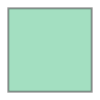

In [12]:
a0= 1.
sympy.geometry.RegularPolygon(c=sympy.geometry.Point(0,0), r= a0*math.sqrt(2), n=4, rot=-math.pi/4)

/home/anacos/anaconda3/envs/workshop/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


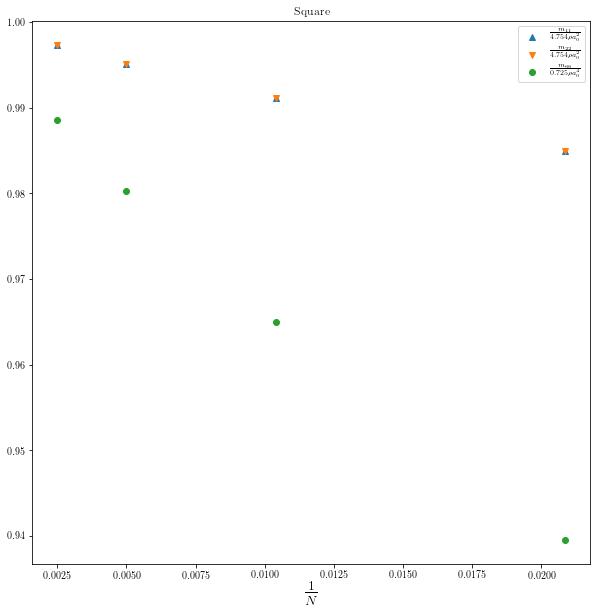

In [21]:
fig = matplotlib.pyplot.figure(figsize=[10,10])
a0= 1.
m_ana11 = 4.754*a0**2
m_ana22 = m_ana11
m_ana66 = 0.725*a0**4
nr = 0
vector=[50,100,200, 400] #number of points around the circumference of the square
N_inv = numpy.zeros(len(vector))
a11 = numpy.zeros(len(vector))
a22 = numpy.zeros(len(vector))
a66 = numpy.zeros(len(vector))
vector_ = []
for N in vector:

    n1 = int(N/8.)   #check if N is multiple of 8. If not, choose a multiple of 8.
    n = n1*2
    vector_.append(n*4)
    N_inv[nr] = 1./(n*4)
    x = []
    y = []
    
    x.extend(numpy.zeros(n)+a0)
    x.extend(numpy.linspace(a0, -a0*(n-2.)/n, n))
    x.extend(numpy.zeros(n)-a0)
    x.extend(numpy.linspace(-a0, a0*(n-2.)/n, n))
    y.extend(numpy.linspace(-a0, a0*(n-2.)/n, n))
    y.extend(numpy.zeros(n)+a0)
    y.extend(numpy.linspace(a0, -a0*(n-2.)/n, n))
    y.extend(numpy.zeros(n)-a0)
    
    #print('lenx',len(x))
    #print('x', x)
    #print('y', y)
    xm, ym = numpy.roll(x, -n1), numpy.roll(y,-n1)
    xp, yp = numpy.roll(xm,-1), numpy.roll(ym,-1)

        
    barx = 0.5*(xp + xm)
    bary = 0.5*(yp + ym)

    nn1 = numpy.zeros(n*4)
    nn2 = numpy.zeros(n*4)
    nn6 = numpy.zeros(n*4)
    for i in range(n*4):
            if round(barx[i],5) == round(a0,5):
                nn1[i] = -1
            if round(barx[i],5) == - round(a0,5):
                nn1[i] = 1
            if round(bary[i],5) == round(a0,5):
                nn2[i] = - 1
            if round(bary[i],5) == - round(a0,5):
                nn2[i] = 1
  
    nn6 = barx*nn2 - bary*nn1
       
    pdcr1, a11j = func(xp, yp, xm, ym, barx, bary, nn1, 4*n)

    pdcr2, a22j = func(xp, yp, xm, ym, barx, bary, nn2, 4*n)
    pdcr6, a66j = func(xp, yp, xm, ym, barx, bary, nn6, 4*n)
    
    
    a11[nr] = a11j/m_ana11
    a22[nr] = a22j/m_ana22
    a66[nr] = a66j/m_ana66
    
    nr = nr +1

pan = -a0**2*((4.754/2)+2)/math.pi*barx/(barx**2+bary**2) 

matplotlib.pyplot.plot(N_inv,a11,'^',N_inv, a22,'v',N_inv,a66,'o')
matplotlib.pyplot.xlabel(r' $\frac{1}{N}  $ ', fontsize= 20)
matplotlib.pyplot.legend([r'$\frac{m_{11}}{4.754\rho a_0^2}$',r"$\frac{m_{22}}{4.754\rho a_0^2}$",
                          r"$\frac{m_{66}}{0.725\rho a_0^4}$"])
matplotlib.pyplot.title('Square ')
matplotlib.pyplot.show()
fig.savefig('Square.pdf')

In [22]:
print('a11 : ', a11, 'a22 :', a22, 'a66 :', a66)

a11 :  [0.98495137 0.99114504 0.99513619 0.99730372] a22 : [0.98495137 0.99114504 0.99513619 0.99730372] a66 : [0.9395786  0.96503663 0.98029679 0.98860915]
